In [1]:
from GGMS.solvers import *
from GGMS.spd_generators import *
from GGMS.stat_funcs import *
from GGMS.experimenting import *
from GGMS.metrics import *
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import pickle
import multiprocessing as mp

In [8]:
with open('data/latest.bin', 'rb') as f:
    density_frames = pickle.load(f)

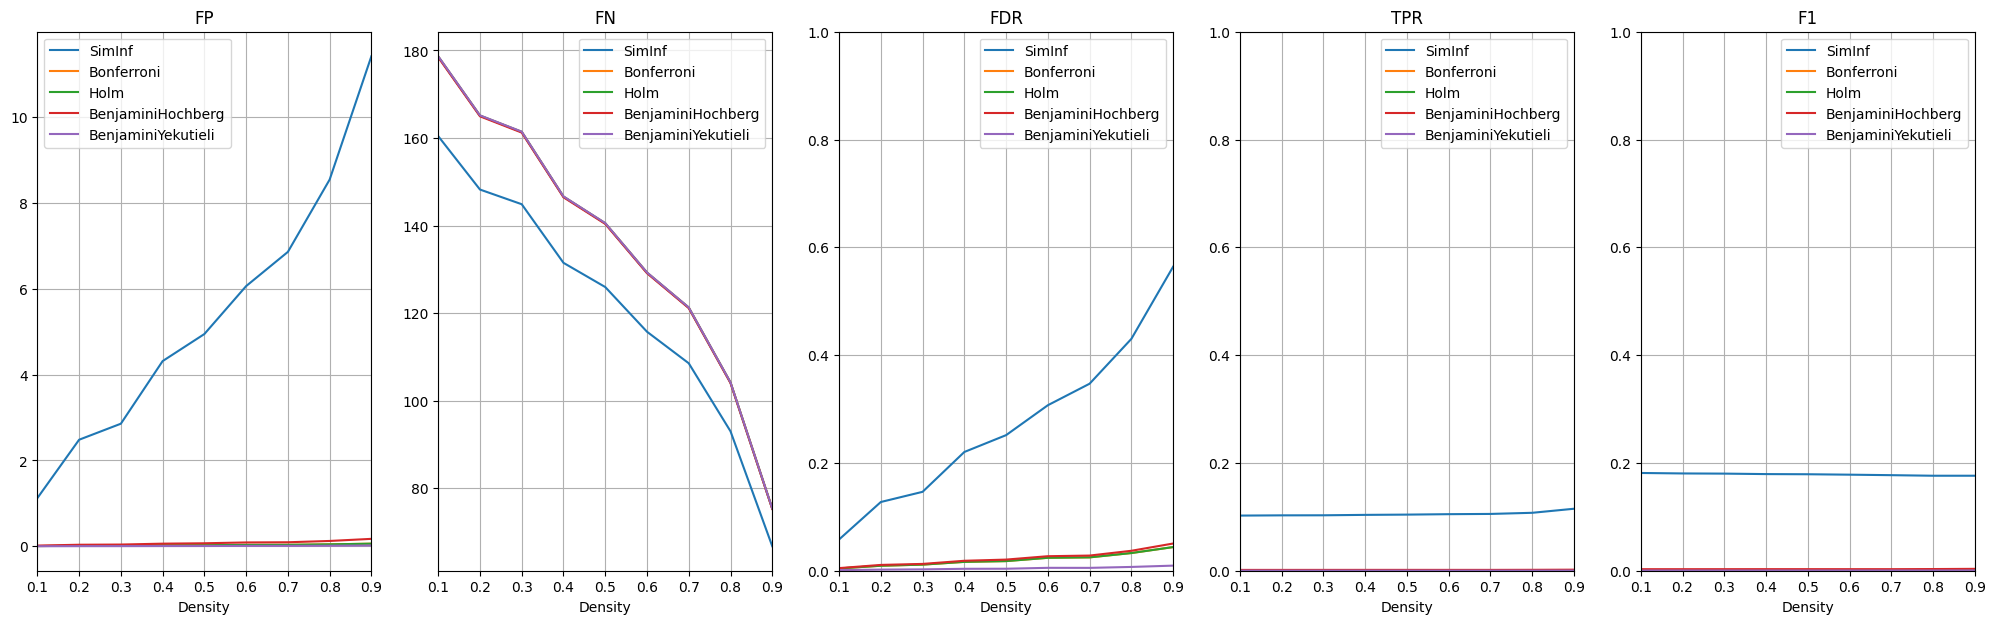

In [9]:
fig, axes = plt.subplots(1, 5)
axes = axes.flatten()
x = np.arange(0.1, 1, 0.1)

for idx, metric in enumerate(density_frames[0].columns):
    density_df = pd.concat([density_frame[metric] for density_frame in density_frames], axis=1).T
    density_df

    for method in density_frames[0].index:
        axes[idx].plot(x, density_df[method], label=method)
    axes[idx].legend()
    axes[idx].set_title(metric)
    axes[idx].set_xlabel('Density')
    axes[idx].set_xlim(0.1, 0.9)
    if idx > 1:
        axes[idx].set_ylim(0, 1)
    axes[idx].grid(True)
fig.set_size_inches((25, 7))

In [10]:
density_frames[-1]

,FP,FN,FDR,TPR,F1
SimInf,11.41444,66.76990,0.564021,0.114979,0.176234
Bonferroni,0.06128,75.35838,0.043866,0.000821,0.001602
Holm,0.06150,75.35820,0.043861,0.000823,0.001606
BenjaminiHochberg,0.17368,75.27410,0.050471,0.001937,0.003485
BenjaminiYekutieli,0.01866,75.40186,0.009451,0.000240,0.000458
